In [1]:
from FFP_SA import FFP

reading parameters...
acoustic
Exact solution. Homogeneous half-space with rigid BC Vs FFP with solid-fluid interface.
reading parameters...
earth-atmosphere
Get Green's
Go to range
Get exact Green's


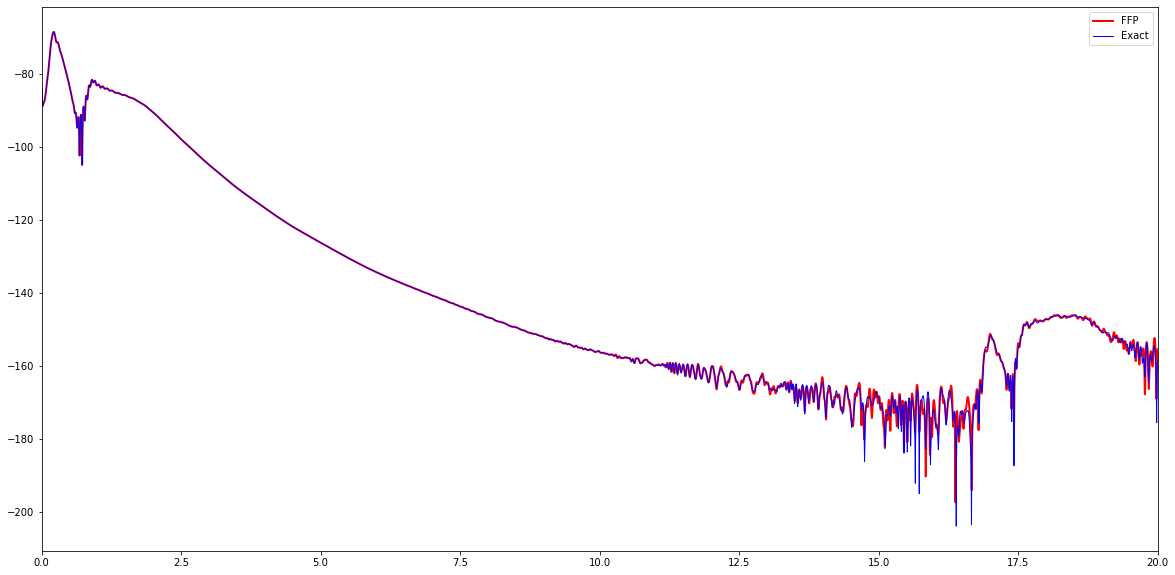

4.070064306259155 seconds
Exact solution. Homogeneous half-space with free BC Vs acoustic FFP.
reading parameters...
only atmosphere
Get Green's
go to range
Get exact Green's


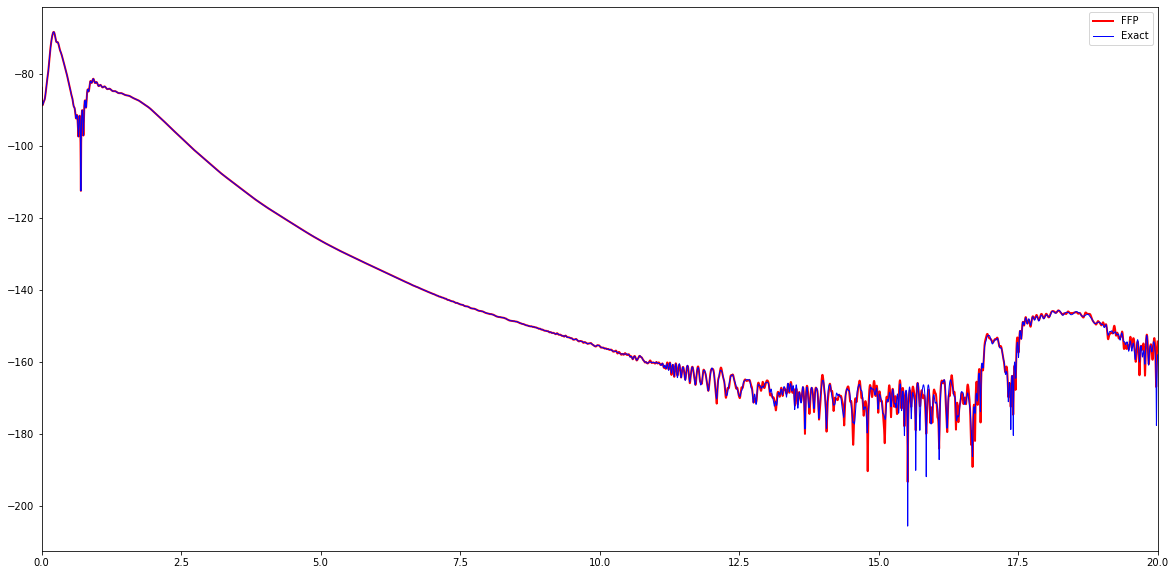

3.325380802154541 seconds
Exact solution. N2
reading parameters...
only atmosphere
Get Green's
Go to range


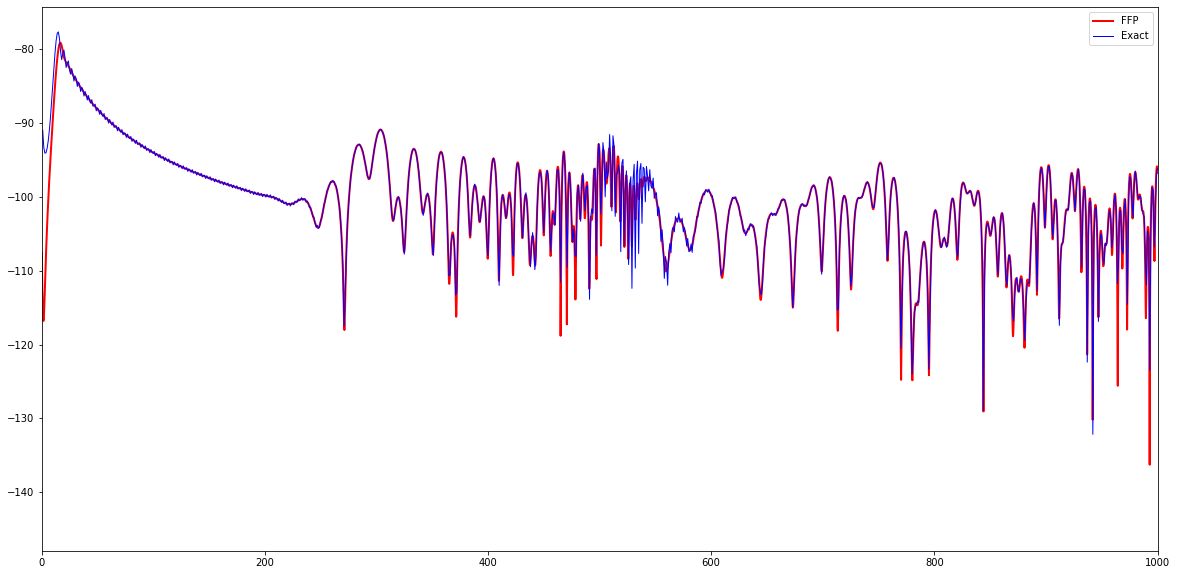

14.255835771560669 seconds
Exact solution. Toy profile
reading parameters...
only atmosphere


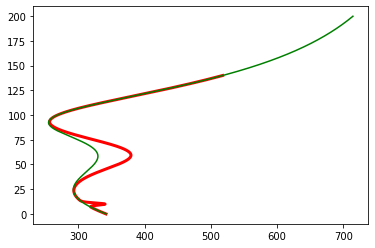

Get Green's
65.96353220939636
Go to range


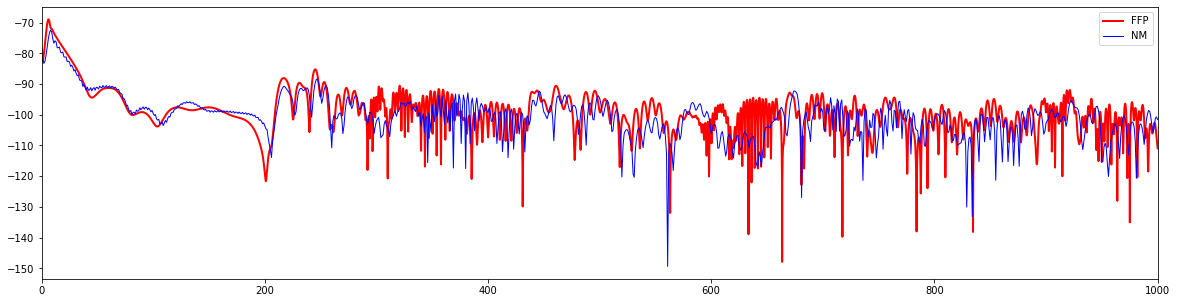

76.662513256073 seconds


In [4]:
FFP('input-nb')